<a href="https://colab.research.google.com/github/lyanevgeny/CartoEGMsReader/blob/main/Signal_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

In [2]:
# Function for plotting of time serie
def plot_signal(x):
  t = np.arange(len(x))
  plt.plot(t, x)

In [4]:
def matching(a, b):
  # Function matches two signals of equal length using Unmached area normalized by sum of the areas
  if len(a)!= len(b):
    print('Error: signals are of different lenght!')
    return float('NaN')
  return 1 - np.sum(abs(a-b))/(np.sum(abs(a)) + np.sum(abs(b)))

In [5]:
def match(template, signal):
  """ input: template, signal with len(signal)>len(template)
      output: match (from 0 to 1), zero-padded template signal for plotting, time of the best correlation
  """
  
  mm = []
  for i in range(len(signal) - len(template)+1):
    m = matching(np.asarray(template), np.asarray(signal[i:i+(len(template))]))
    mm.append(m)
  best_i = np.argmax(mm)
  padded_template = np.append(np.zeros(best_i), template)
  return np.nanmax(mm), padded_template, best_i

In [36]:
# Function for cross correlation of two signals
def correlate_signals(template, signal):
  """ input: template, signal with len(signal)>len(template)
      output: cross correlation coefficient (from 0 to 1), zero-padded template signal for plotting, time of the best correlation
  """
  rr = []
  for i in range(len(signal)-len(template)+1):
    r, _ = pearsonr(template, signal[i:i+(len(template))])
    rr.append(r)
  best_i = np.argmax(rr)
  padded_template = np.append(np.zeros(best_i), template)
  return np.nanmax(rr), padded_template, best_i

In [37]:
def similarity(template, signal):
  """ input: template, signal with len(signal)>len(template)
      1) finds the best correlated peak
      2) matches the signals
      output: match (from 0 to 1), zero-padded template signal for plotting, time of the best correlation
  """
  r, padded_template, best_i = correlate_signals(template, signal)

  m, _, _ = match(template, signal[best_i: best_i + len(template)])
  return m, padded_template, best_i

In [34]:
def plot_similarity(template, signal, method='similarity'):
  if method == 'correlation':
    r, padded_template, best_i = correlate_signals(template, signal)
  elif method == 'match':
    r, padded_template, best_i = match(template, signal)
  elif method == 'similarity':
    r, padded_template, best_i = similarity(template, signal)
  else:
    print('incorrect method!')
    return

  plot_signal(signal)
  plot_signal(padded_template)
  return r

In [8]:
# upload a file with EGMs from local
myfile = files.upload()
filename = next(iter(myfile))
df = pd.read_csv(filename,sep='\s+',skiprows=(0,1,2),header=(0))
df.columns

Saving 3-SR_P17_ECG_Export.txt to 3-SR_P17_ECG_Export.txt


Index(['M1(1)', 'M2(2)', 'M3(3)', 'M4(4)', 'CS1(11)', 'CS2(12)', 'CS3(13)',
       'CS4(14)', 'CS5(15)', 'CS6(16)', 'CS7(17)', 'CS8(18)', 'CS9(19)',
       'CS10(20)', 'V1(22)', 'V2(23)', 'V3(24)', 'V4(25)', 'V5(26)', 'V6(27)',
       'M1-M2(92)', 'M3-M4(94)', 'CS1-CS2(101)', 'CS2-CS3(102)',
       'CS3-CS4(103)', 'CS4-CS5(104)', 'CS5-CS6(105)', 'CS6-CS7(106)',
       'CS7-CS8(107)', 'CS8-CS9(108)', 'CS9-CS10(109)', 'I(110)', 'II(111)',
       'III(112)', 'aVL(171)', 'aVR(172)', 'aVF(173)'],
      dtype='object')

In [9]:
# upload a file with EGMs from local
myfile = files.upload()
filename = next(iter(myfile))
df2 = pd.read_csv(filename,sep='\s+',skiprows=(0,1,2),header=(0))
df2.columns

Saving 3-1-VESF_P47_ECG_Export.txt to 3-1-VESF_P47_ECG_Export.txt


Index(['M1(1)', 'M2(2)', 'M3(3)', 'M4(4)', 'CS1(11)', 'CS2(12)', 'CS3(13)',
       'CS4(14)', 'CS5(15)', 'CS6(16)', 'CS7(17)', 'CS8(18)', 'CS9(19)',
       'CS10(20)', 'V1(22)', 'V2(23)', 'V3(24)', 'V4(25)', 'V5(26)', 'V6(27)',
       'M1-M2(92)', 'M3-M4(94)', 'CS1-CS2(101)', 'CS2-CS3(102)',
       'CS3-CS4(103)', 'CS4-CS5(104)', 'CS5-CS6(105)', 'CS6-CS7(106)',
       'CS7-CS8(107)', 'CS8-CS9(108)', 'CS9-CS10(109)', 'I(110)', 'II(111)',
       'III(112)', 'aVL(171)', 'aVR(172)', 'aVF(173)'],
      dtype='object')

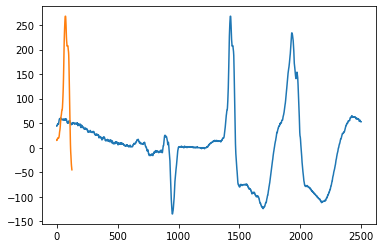

In [16]:
# get some signal
signal = df['II(111)']

# define template
template = signal[1355:1480]

plot_signal(signal) # blue
plot_signal(template) #orange

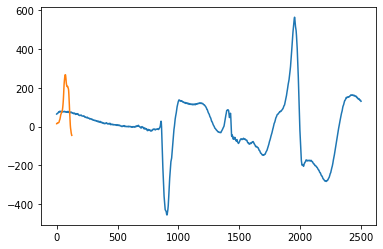

In [17]:
# get some signal 
signal2 = df['V3(24)']
# template is predifinded previously 
plot_signal(signal2)
plot_signal(template)

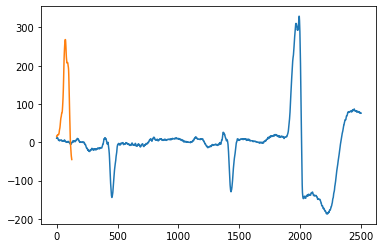

In [18]:
# get another signal
signal3 = df2['II(111)']
#template is predifined previously
plot_signal(signal3)
plot_signal(template)

similarity by cross correlation =  0.9999999999999998


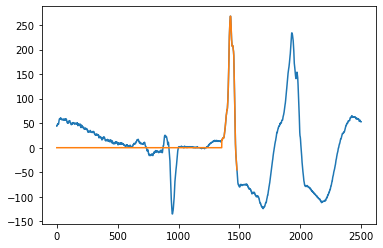

In [19]:
# correlate signal with template and draw the best matched position
r = plot_similarity(template, signal, method='correlation')
print('similarity by cross correlation = ', r)

similarity measured by cross correlation =  0.9780450056722865


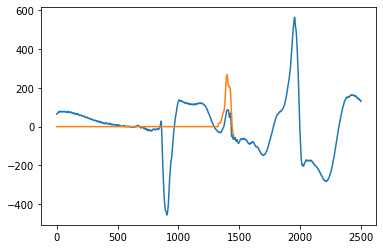

In [20]:
# correlate new signal with template and draw the best matching position
r = plot_similarity(template, signal2, method = 'correlation')
print('similarity measured by cross correlation = ', r)


similarity measured by cross correlation =  0.9164324435915411


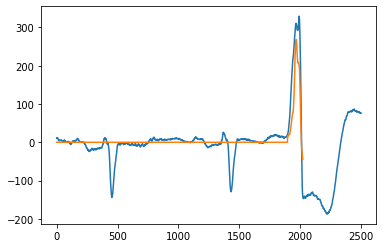

In [21]:
# correlate new signal with template and draw the best matching position
r = plot_similarity(template, signal3, method='correlation')
print('similarity measured by cross correlation = ', r)


similarity measured by combi =  1.0


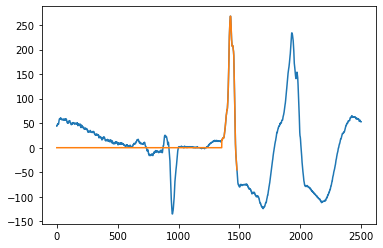

In [29]:
# match new signal with template and draw the best matching position
r = plot_similarity(template, signal, method = 'match')
print('similarity measured by combi = ', r)

similarity measured by combi =  0.7849894226936873


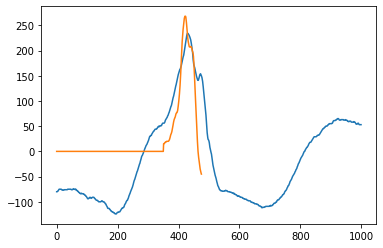

In [23]:
# match new signal with template and draw the best matching position
r = plot_similarity(template, signal[1500:], method = 'match')
print('similarity measured by combi = ', r)

similarity measured by combi =  0.7321485580504417


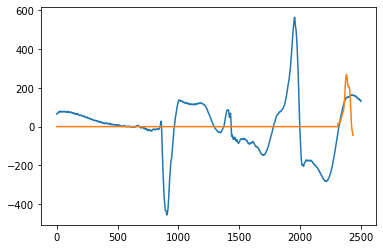

In [42]:
# match new signal with template and draw the best matching position
r = plot_similarity(template, signal2, method = 'match')
print('similarity measured by combi = ', r)

similarity measured by combi =  0.7380226423098337


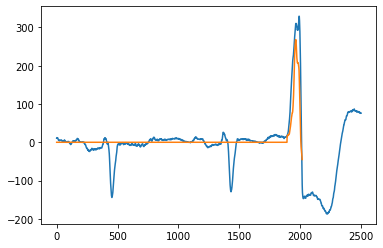

In [43]:
# match new signal with template and draw the best matching position
r = plot_similarity(template, signal3, method = 'match')
print('similarity measured by combi = ', r)

similarity measured by combi =  1.0


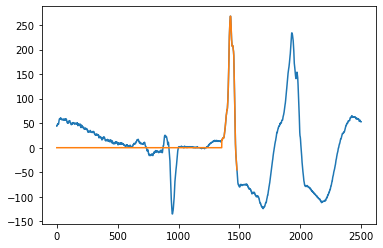

In [39]:
# find similarity of signal to template and draw the best matching position
r = plot_similarity(template, signal, method='similarity')
print('similarity measured by combi = ', r)

similarity measured by combi =  0.38714660899119424


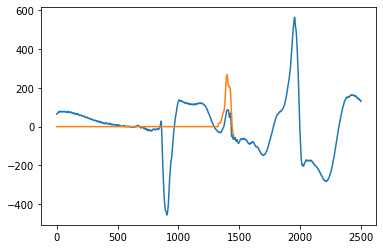

In [44]:
# find similarity of signal to template and draw the best matching position
r = plot_similarity(template, signal2, method='similarity')
print('similarity measured by combi = ', r)

similarity measured by combi =  0.7343602640679032


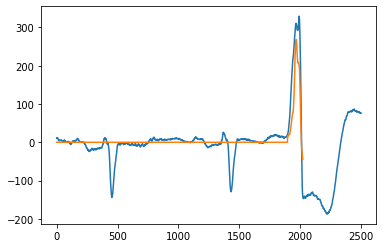

In [45]:
# find similarity of signal to template and draw the best matching position
r = plot_similarity(template, signal3, method='similarity')
print('similarity measured by combi = ', r)